# SVM Implementsation

In [1]:
# # basic import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import warnings
warnings.filterwarnings('ignore')

C:\Users\Ramdas\AppData\Local\Temp\ipykernel_17296\2724669020.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
df = pd.read_csv(r"C:\Users\Ramdas\Desktop\iNEURON\FSDS_September\10. Machine_Learning\housing.csv",header=None)

In [3]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per 10,000∗PTRATIO−pupil−teacherratiobytown∗B−1000(Bk−0.63)2whereBkistheproportionofblacksbytown∗LSTAT−∗MEDV−Medianvalueofowner−occupiedhomesin1000's



<AxesSubplot: >

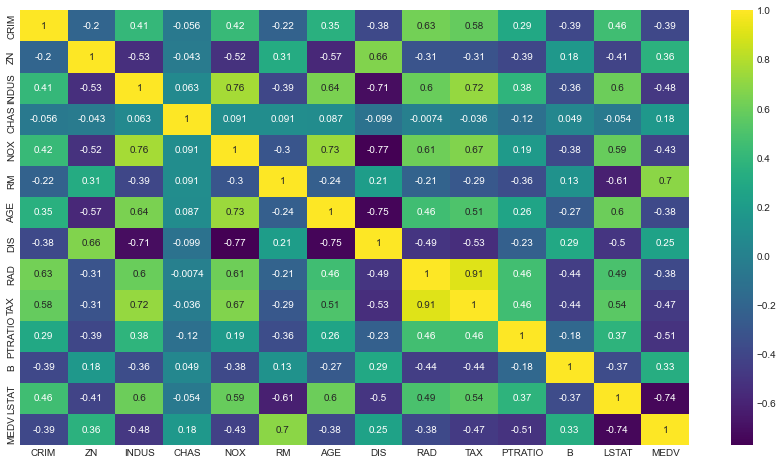

In [4]:
plt.figure(figsize = (15,8))

sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [5]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [6]:
## feature scaling is required
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
scaled_X = scaler.fit_transform(X)

In [8]:
## do train train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.20, random_state=42)

In [9]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
y_pred = svr.predict(X_test)

In [10]:
from sklearn.metrics import r2_score , mean_squared_error
print(" R_SQUARE OF MODEL IS",r2_score(y_test,y_pred))
print("Mean square  error of model is ",mean_squared_error(y_test,y_pred))

 R_SQUARE OF MODEL IS 0.6496425583214102
Mean square  error of model is  25.693036656663203


In [11]:
svr.support_vectors_.shape

(393, 13)

# Gridsearch cv.

In [ ]:
from sklearn.model_selection import GridSearchCV
parameter={'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
           'degree':[0.5,1,2,3],
           'gamma':['scale', 'auto'],
           'C':[0.01,0.05,0.1,0.9,1,2,3]
          }

model = GridSearchCV(svr,param_grid=parameter,cv=5)

model.fit(X,y)
print(model.best_params_)
print(model.best_score_)